In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv('sp500_stocks.csv', index_col='Date', parse_dates=True)
df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2010-01-04,MMM,40.835045,69.414719,69.774246,69.122070,69.473244,3640265.0
2010-01-05,MMM,40.579273,68.979935,69.590302,68.311035,69.230766,3405012.0
2010-01-06,MMM,41.154755,69.958191,70.735786,69.824417,70.133781,6301126.0
2010-01-07,MMM,41.184277,70.008362,70.033447,68.662209,69.665550,5346240.0
2010-01-08,MMM,41.474468,70.501671,70.501671,69.648827,69.974915,4073337.0
...,...,...,...,...,...,...,...
2024-04-01,ZTS,167.020004,167.020004,169.490005,166.119995,168.990005,1896500.0
2024-04-02,ZTS,165.009995,165.009995,166.169998,163.639999,165.669998,2391500.0
2024-04-03,ZTS,162.970001,162.970001,166.259995,162.639999,165.000000,2481200.0


In [4]:
NVDA_df = df[df['Symbol'] == 'NVDA']
NVDA_df = NVDA_df.asfreq('d')
NVDA_df = NVDA_df.fillna(method='ffill')
NVDA_df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2010-01-04,NVDA,4.247546,4.622500,4.655000,4.527500,4.627500,80020400.0
2010-01-05,NVDA,4.309570,4.690000,4.740000,4.605000,4.605000,72864800.0
2010-01-06,NVDA,4.337137,4.720000,4.730000,4.642500,4.687500,64916800.0
2010-01-07,NVDA,4.252139,4.627500,4.715000,4.592500,4.695000,54779200.0
2010-01-08,NVDA,4.261328,4.637500,4.670000,4.562500,4.590000,47816800.0
...,...,...,...,...,...,...,...
2024-04-01,NVDA,903.630005,903.630005,922.250000,892.039978,902.989990,45244100.0
2024-04-02,NVDA,894.520020,894.520020,900.940002,876.200012,884.479980,43306400.0
2024-04-03,NVDA,889.640015,889.640015,903.739990,884.000000,884.840027,37006700.0


In [5]:
NVDA_df = NVDA_df[NVDA_df.index >= '2020-01-01']
NVDA_df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-01,NVDA,58.694374,58.825001,58.919998,57.532501,57.724998,23100400.0
2020-01-02,NVDA,59.844322,59.977501,59.977501,59.180000,59.687500,23753600.0
2020-01-03,NVDA,58.886452,59.017502,59.457500,58.525002,58.775002,20538400.0
2020-01-04,NVDA,58.886452,59.017502,59.457500,58.525002,58.775002,20538400.0
2020-01-05,NVDA,58.886452,59.017502,59.457500,58.525002,58.775002,20538400.0
...,...,...,...,...,...,...,...
2024-04-01,NVDA,903.630005,903.630005,922.250000,892.039978,902.989990,45244100.0
2024-04-02,NVDA,894.520020,894.520020,900.940002,876.200012,884.479980,43306400.0
2024-04-03,NVDA,889.640015,889.640015,903.739990,884.000000,884.840027,37006700.0


In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def stationarity(col):
    res = adfuller(col.dropna())
    print("Test Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

Test Statistic: 2.198907222743667
P-Value: 0.9988816046733524
Non-Stationary


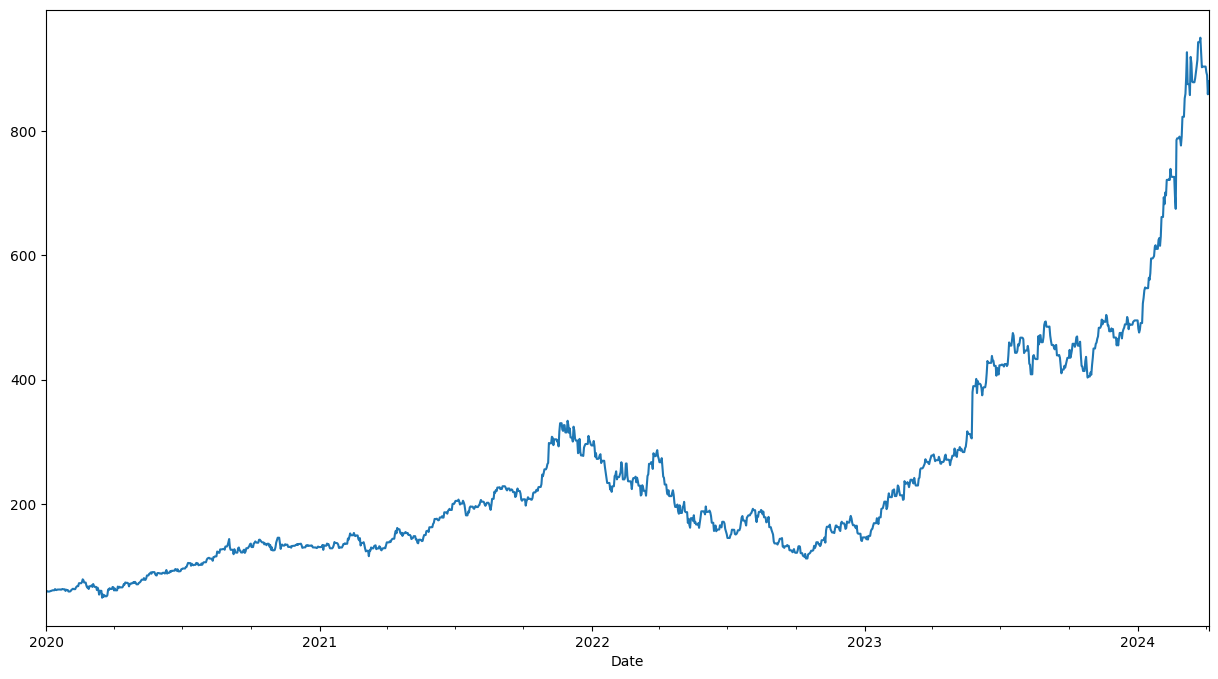

In [7]:
NVDA_df['Close'].plot(figsize=(15,8))

stationarity(NVDA_df['Close'])

Test Statistic: -7.20081451810508
P-Value: 2.3681715652783894e-10
Stationary


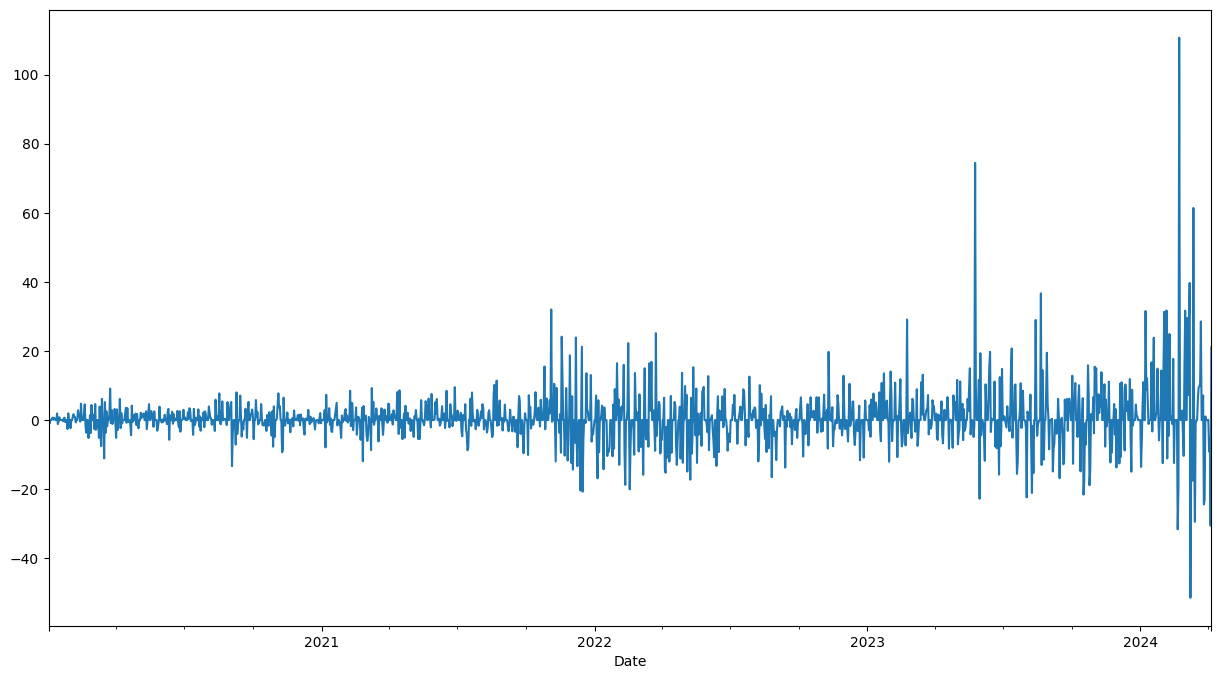

In [8]:
diff_1_close = NVDA_df['Close'].diff().dropna()
diff_1_close.plot(figsize=(15,8))

stationarity(diff_1_close)

In [9]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs

d_val = ndiffs(NVDA_df['Close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


In [10]:
#splitting the data to train and test sets based on Ntest value
#last 30 days
Ntest = 60
train = NVDA_df.iloc[:-Ntest]
test = NVDA_df.iloc[-Ntest:]
train_idx = NVDA_df.index <= train.index[-1]
test_idx = NVDA_df.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['Close'],
                      d = d_val,
                      start_p = 0,
                      max_p = 10,
                      start_q = 0,
                      max_q = 10,
                      stepwise=False,
                      max_order=20,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=9731.001, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=9732.998, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=9731.755, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=9731.170, Time=0.19 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=9733.147, Time=0.30 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=9734.222, Time=0.35 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=9735.245, Time=0.58 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=9724.177, Time=0.68 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=9725.868, Time=0.86 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=9722.818, Time=0.96 sec
 ARIMA(0,1,10)(0,0,0)[1] intercept   : AIC=9724.184, Time=1.11 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=9732.998, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=9734.999, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=9724.731, Time=0.43 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=9726.713, Time=0.45 sec
 ARIMA(1,

In [11]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (3, 1, 4),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [12]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
def plot_result(model, data, col_name, Ntest):
    
    params = model.get_params()
    d = params['order'][1]
    
    #In sample data prediction
    train_pred = model.predict_in_sample(start=d, end=-1)
    #out of sample prediction
    test_pred, conf = model.predict(n_periods=Ntest, return_conf_int=True)
    
    #plotting real values, fitted values and prediction values
    fig, ax= plt.subplots(figsize=(15,8))
    ax.plot(data[col_name].index, data[col_name], label='Actual Values')
    ax.plot(train.index[d:], train_pred, color='green', label='Fitted Values')
    ax.plot(test.index, test_pred, label='Forecast Values')
    ax.fill_between(test.index, conf[:,0], conf[:,1], color='red', alpha=0.3)
    ax.legend()
    
    #evaluating the model using RMSE and MAE metrics
    y_true = test[col_name].values
    rmse = np.sqrt(mean_squared_error(y_true,test_pred))
    mae = mean_absolute_error(y_true,test_pred)

    return rmse, mae

Mean Squared Error: 

 19471.077610182416
Mean Absolute Error:  119.50354967298988


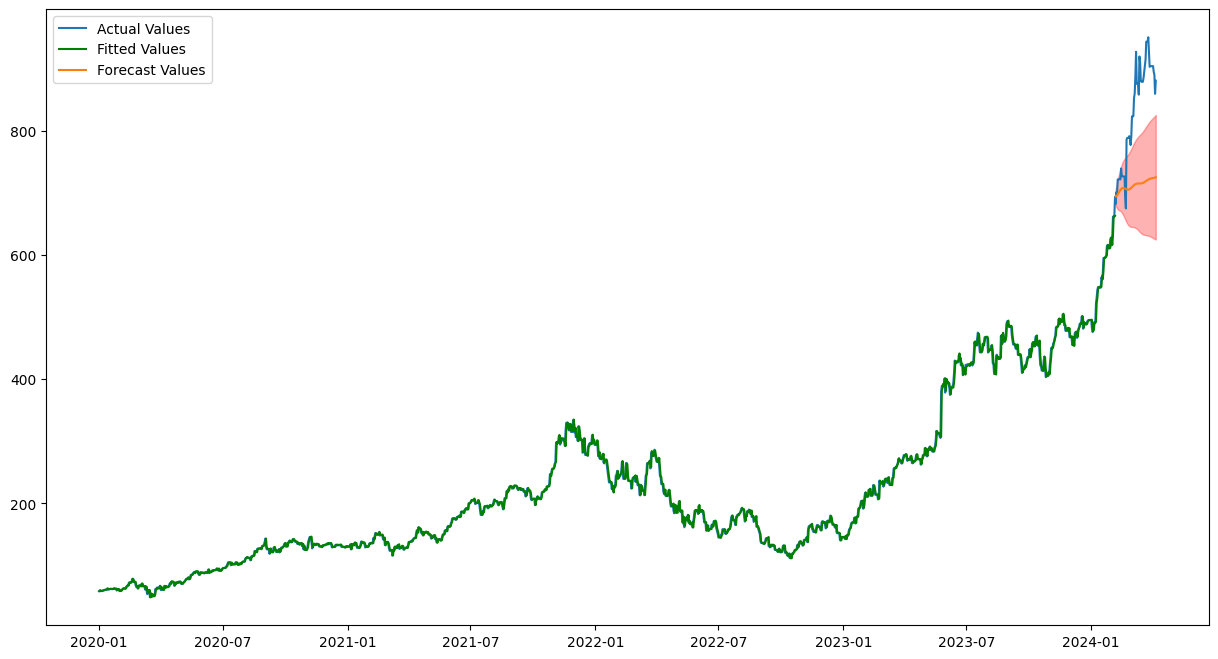

In [13]:
rmse , mae = plot_result(model, NVDA_df, 'Close', Ntest=60)
print('Mean Squared Error: ', rmse**2)
print('Mean Absolute Error: ', mae)

In [14]:
NVDA_df['log Close'] = np.log(NVDA_df['Close'])
NVDA_df

C:\Users\ibrah\AppData\Local\Temp\ipykernel_43916\1483754707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog_df['log Close'] = np.log(goog_df['Close'])


,Symbol,Adj Close,Close,High,Low,Open,Volume,log Close
Date,,,,,,,,
2020-01-01,NVDA,58.694374,58.825001,58.919998,57.532501,57.724998,23100400.0,4.074567
2020-01-02,NVDA,59.844322,59.977501,59.977501,59.180000,59.687500,23753600.0,4.093970
2020-01-03,NVDA,58.886452,59.017502,59.457500,58.525002,58.775002,20538400.0,4.077834
2020-01-04,NVDA,58.886452,59.017502,59.457500,58.525002,58.775002,20538400.0,4.077834
2020-01-05,NVDA,58.886452,59.017502,59.457500,58.525002,58.775002,20538400.0,4.077834
...,...,...,...,...,...,...,...,...
2024-04-01,NVDA,903.630005,903.630005,922.250000,892.039978,902.989990,45244100.0,6.806420
2024-04-02,NVDA,894.520020,894.520020,900.940002,876.200012,884.479980,43306400.0,6.796287
2024-04-03,NVDA,889.640015,889.640015,903.739990,884.000000,884.840027,37006700.0,6.790817


Test Statistic: -0.18145960847236664
P-Value: 0.9406958009189823
Non-Stationary


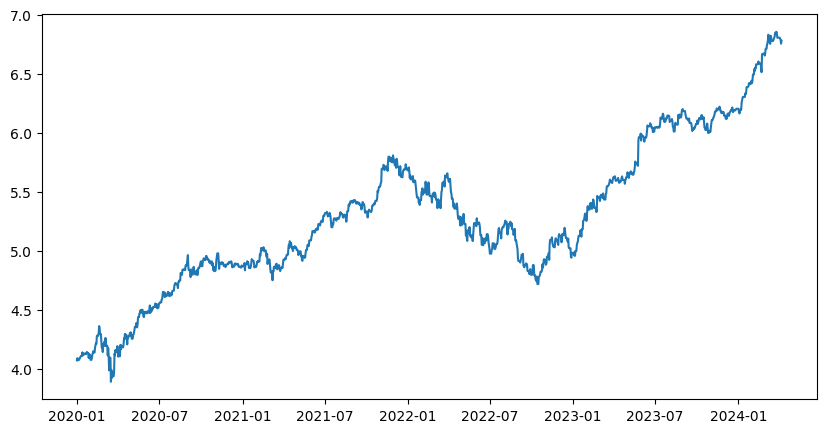

In [15]:
log_close = NVDA_df['log Close'].dropna()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(log_close)

stationarity(log_close)

<Axes: xlabel='Date'>

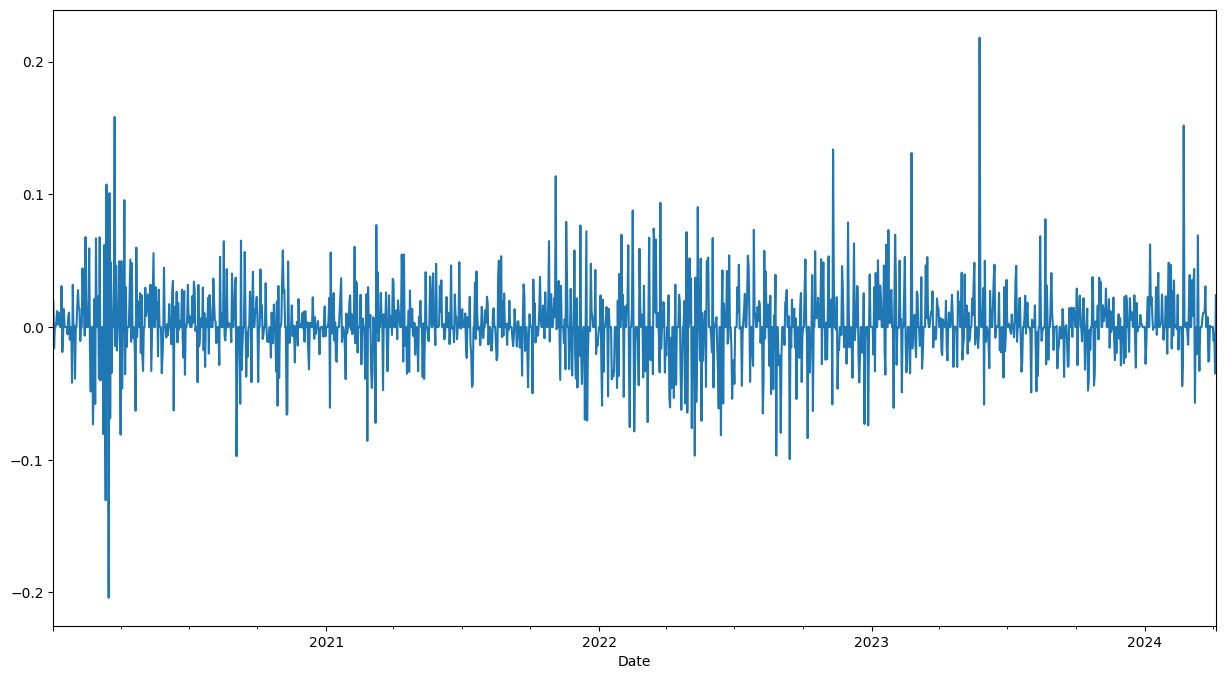

In [16]:
diff_1_logclose = NVDA_df['log Close'].diff().dropna()
diff_1_logclose.plot(figsize=(15,8))

In [17]:
d_val = ndiffs(NVDA_df['log Close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


In [18]:
#splitting the data to train and test sets based on Ntest value
#last 30 days
Ntest = 60
train = NVDA_df.iloc[:-Ntest]
test = NVDA_df.iloc[-Ntest:]
train_idx = NVDA_df.index <= train.index[-1]
test_idx = NVDA_df.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['log Close'],
                      d = d_val,
                      start_p = 0,
                      max_p = 10,
                      start_q = 0,
                      max_q = 10,
                      stepwise=False,
                      max_order=20,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-6447.675, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-6458.105, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-6456.219, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=-6454.402, Time=0.45 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-6453.191, Time=0.35 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=-6451.670, Time=0.75 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=-6449.808, Time=0.55 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=-6452.697, Time=1.06 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=-6452.966, Time=0.78 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=-6455.485, Time=1.03 sec
 ARIMA(0,1,10)(0,0,0)[1] intercept   : AIC=-6453.526, Time=1.40 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=-6457.754, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=-6456.163, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=-6454.237, Time=0.28 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=-6453.491, Time=0.5

In [19]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (7, 1, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

Mean Squared Error:  0.023139280143799897
Mean Absolute Error:  0.13337765136055454


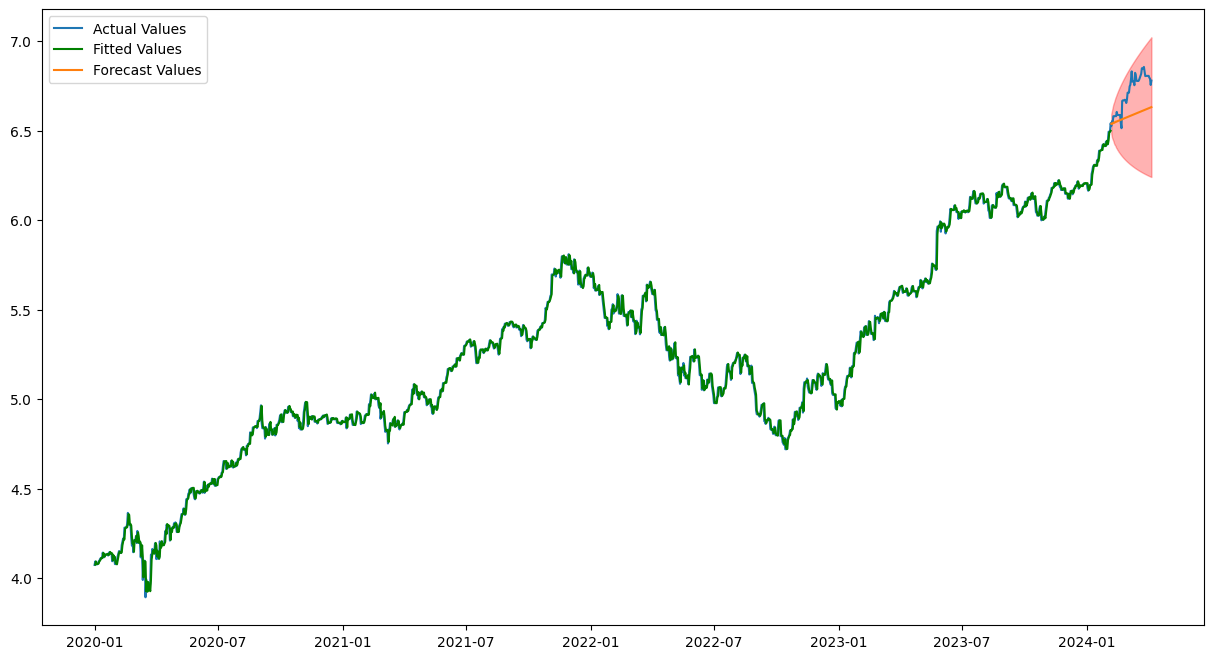

In [20]:

rmse, mae = plot_result(model, NVDA_df, 'log Close', Ntest=60)
print('Mean Squared Error: ', rmse**2)
print('Mean Absolute Error: ', mae)